In [112]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)


import astropy.units as u
from astropy.constants import M_sun, R_sun, m_p, G, L_sun, R_earth
import matplotlib.pyplot as plt
import numpy as np

amu = 1.66054e-24 * u.g

hide_toggle()


# Q 8.1
### a

The mass defect fractions of each reaction is defined as $\frac{m_{reactants} - m_{products}}{m_{products}}$

The masses of each of the elements in the equations are given below in amu:

In [91]:
mH = 1.007825031898 # * amu
mHe = 4.002603 # * amu
mC = 12. # * amu
mO = 15.994914  # * amu
mSi = 27.9769265 # * amu
mFe = 55.9349375 # * amu

Calculating $\frac{m_{reactants} - m_{products}}{m_{products}}$, we get the following mass defect fractions

In [103]:
reactions = {
    '4 H-1 -> He-4': [4 * mH, mHe],
    '3 He-4 -> C-12': [3*mHe, mC],
    'C-12 + He-4 -> O-16': [mC + mHe, mO],
    '2 O-16 -> Si-28 + He-4': [mO + mO, mSi + mHe],
    '2 Si-28 -> Fe-56': [2 * mSi, mFe]
}

m_frac = []
for reaction in reactions.keys():
    m_reac, m_prod = reactions[reaction]
    print(f'{reaction.ljust(24)}: {round((m_reac - m_prod) / m_reac, 5)}')
    m_frac.append((m_reac - m_prod) / m_reac)

hide_toggle()

4 H-1 -> He-4           : 0.00712
3 He-4 -> C-12          : 0.00065
C-12 + He-4 -> O-16     : 0.00048
2 O-16 -> Si-28 + He-4  : 0.00032
2 Si-28 -> Fe-56        : 0.00034


### b.
In general, the mass fractions of each reaction decreases as the masses of the reactants increases. This means that the nuclear time scale of each reaction becomes shorter and shorter for a star burning heavier and heavier elements to maintain hydrostatic equilibrium. As such, the star spends less and less time in each subsequent phase of stellar burning.

# Q 8.4

From the book we have that the core mass needed to fuse a particular element is propotional to the temperature needed to ignite fusion of that element to the 3/4 power. Since we know that the critical core mass for helium fusion is $0.3M_\odot$, we can use this proportionality, and $T_{ign}$ for the other fusion processes to find the minimum masses needed to ignite those reactions:

$M_{crit} \propto T_{ign}^{3/4}$
So $\frac{M_{crit, X}}{M_{crit, He}} = \Big(\frac{T_{ign, X}}{T_{ign, He}}\Big)^{3/4}$

$M_{crit, X} = \Big(\frac{T_{ign, X}}{T_{ign, He}}\Big)^{3/4} M_{crit, He}$

From table 8.4 in the book, we have $T_{thresh}$ for a variety of reactions, where 3-$\alpha$ fusion is helium fusion.

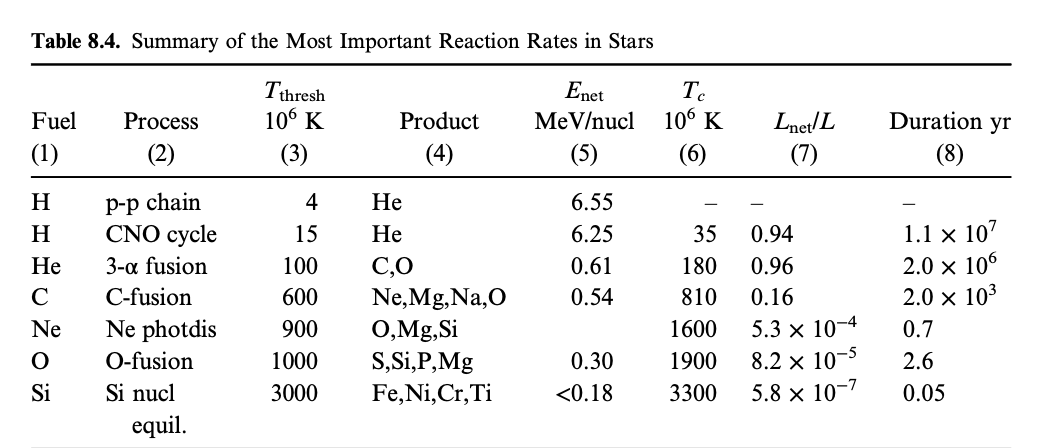

Calculate the minimum core mass for each fusion phase:

In [104]:
def m_crit(T_X):
    return ((T_X / 100e6) ** .75 * 0.3 * M_sun) / M_sun

fusions = {
    'C-fusion': 600e6,
    'Ne-photodis': 900e6,
    'O-fusion': 1000e6,
    'Si nucl': 3000e6
}

print("Core Masses for fusion phases")
print('-'*30)
for f, T_X in fusions.items():
    print(f'{f.ljust(12)} : {m_crit(T_X):.2f} M_sun')

hide_toggle()

Core Masses for fusion phases
------------------------------
C-fusion     : 1.15 M_sun
Ne-photodis  : 1.56 M_sun
O-fusion     : 1.69 M_sun
Si nucl      : 3.85 M_sun


# Q 9.1
Using the following equations for various timescales:

$\tau_{dyn} = \frac{1}{\sqrt{G\bar{\rho}}}$

$\tau_{KH} = \frac{GM^2}{RL}$

$\tau_{nucl} = \frac{f_MM\epsilon_n}{L} \approx \frac{(M/M_\odot)}{(L/L_\odot)} \times 10^{10} years $

We can calculate the various time scales for each of the 4 stars:

In [107]:
#
def t_dyn(M, R, L):
    M *= M_sun
    R *= R_sun
    L *= L_sun
    return (1 / np.sqrt(G * 3/4 * M * R ** -3)).cgs

def t_KH(M, R, L):
    M *= M_sun
    R *= R_sun
    L *= L_sun
    return (G * M ** 2 / (R * L)).cgs

def t_nucl(M, R, L):
    return (M / L * 1e10 * u.yr).cgs
stars = {
    '1MS': {'M': 1, 'R': 1, 'L': 1},
    '60MS': {'M': 60, 'R': 15, 'L': 8e5},
    '15RSG': {'M': 15, 'R': 3.3e3, 'L': 4.5e5},
    '0.6WD': {'M': .6, 'R': .012, 'L': 1e-3}
}

for star in stars.keys():
    print(star)
    print('-' * 35)
    print(f"{'Dynamical:'.ljust(20)} {t_dyn(**stars[star]):.3e}")
    print(f"{'Kelvin-Helmholtz:'.ljust(20)} {t_KH(**stars[star]):.3e}")
    print(f"{'Nuclear:'.ljust(20)} {t_nucl(**stars[star]):.3e}")
    print()

hide_toggle()

1MS
-----------------------------------
Dynamical:           1.839e+03 s
Kelvin-Helmholtz:    9.909e+14 s
Nuclear:             3.156e+17 s

60MS
-----------------------------------
Dynamical:           1.379e+04 s
Kelvin-Helmholtz:    2.973e+11 s
Nuclear:             2.367e+13 s

15RSG
-----------------------------------
Dynamical:           9.003e+07 s
Kelvin-Helmholtz:    1.501e+08 s
Nuclear:             1.052e+13 s

0.6WD
-----------------------------------
Dynamical:           3.121e+00 s
Kelvin-Helmholtz:    2.973e+19 s
Nuclear:             1.893e+20 s



Note that some of these timescales don't make sense, particularly for the white dwarf, since the approximation we used for nuclear time scale assumes that fusion is currently taking place. However, we do see a few trends:

1. The Dynamical time scale tends to be the shortest, followed by the thermal timescale, and finally the nuclear time scale. (dynamuca time scale and thermal time scale are flipped for the 15$\,M_\odot$ red super giant due to its huge radius (which leads to very low $\bar{\rho}$) and high luminosity (which speeds up the thermal time scale).
2. The dynamical time scale is dominated of the radius of the star $\tau_{dyn} \propto R^{-3}$.


# Q 9.2

If the sun were to suddenly stop fusing, the gravity would no longer be balanced by pressure and the sun would collapse on itself on the order of the **dynamical time scale** (~30 minutes, see Q9.1), until it could be supported by electron degeneracy. This change would likely be noticeable by many people, because while the sun would remain the same luminosity, its angular size on the sky would decrease by a factor of about 100, meaning the surface brightness of the sun would increase by 10000x! Thus the sun would be much more difficult to look at, and would be able to shine through a variety of atmospheric layers (e.g. atmosphere at sunset, smog, or thin clouds) much more strongly. 

However if those with access to a neutrino or gravitational wave detector might be able to tell on order of the photon travel time to the Earth, since those effects would occur immediately.

# Q 11.1

A star (star 1) with a polytrope index $\gamma=5/3$ has a stiffer equation of state than a star with $\gamma=4/3$. This means that as a force is exerted compressing the star (e.g. gravity), the gas pressure required to match that compressive force can be accomplished by a less dense gass for $\gamma=5/3$ than for a star with $\gamma=4/3$, since $P \propto \rho^\gamma$. This means that for two stars of the same mass, and thus central gravitational force, the star with $\gamma=4/3$ will have a more concentrated density structure and a higher density at the center.

Another way to think about this using the lagrangian formulation. Suppose| we build up a star by adding dm of mass in a spherical shells until we reach $M_{star}$. Each dm for the star with $\gamma=4/3$ will cause the material to compress more than for the star with $\gamma=5/3$, thus resulting in a more concentrated density structure.